In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- Importing the dataset

In [2]:
dataset = pd.read_csv('StressLevel.csv')

In [3]:
dataset.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
len(dataset)

1100

In [5]:
X = dataset.iloc[:, [0, 6]].values
y = dataset.iloc[:, -1].values

In [6]:
print(X)

[[14  2]
 [15  1]
 [12  2]
 ...
 [ 4  5]
 [21  1]
 [18  0]]


In [7]:
print(y)

[1 2 1 ... 0 2 2]


- Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
len(X_train)

825

In [10]:
len(X_test)

275

- Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[ 1.63185922e+00 -1.06152059e+00]
 [-1.47055355e+00  1.51044560e+00]
 [-4.90844253e-01  8.67454050e-01]
 ...
 [-9.89605349e-04 -4.18529043e-01]
 [-1.79712331e+00  1.51044560e+00]
 [-9.89605349e-04 -4.18529043e-01]]


In [13]:
print(X_test)

[[-9.80698901e-01  1.51044560e+00]
 [-1.64274488e-01  2.24462503e-01]
 [ 9.78719690e-01 -1.06152059e+00]
 [-4.90844253e-01  1.51044560e+00]
 [-9.80698901e-01 -1.06152059e+00]
 [-3.27559371e-01  2.24462503e-01]
 [-9.89605349e-04  2.24462503e-01]
 [ 4.88865042e-01 -4.18529043e-01]
 [ 1.63185922e+00 -1.06152059e+00]
 [-8.17414018e-01  1.51044560e+00]
 [-3.27559371e-01  2.24462503e-01]
 [ 6.52149925e-01 -1.06152059e+00]
 [-1.63383843e+00  1.51044560e+00]
 [-1.63383843e+00 -4.18529043e-01]
 [-3.27559371e-01  2.24462503e-01]
 [ 4.88865042e-01 -4.18529043e-01]
 [ 9.78719690e-01 -1.06152059e+00]
 [ 1.62295277e-01 -4.18529043e-01]
 [-6.54129136e-01  8.67454050e-01]
 [-1.30726867e+00  1.51044560e+00]
 [-1.47055355e+00  8.67454050e-01]
 [-9.89605349e-04 -4.18529043e-01]
 [ 1.14200457e+00 -1.06152059e+00]
 [-6.54129136e-01  1.51044560e+00]
 [ 9.78719690e-01 -1.06152059e+00]
 [-4.90844253e-01  8.67454050e-01]
 [ 1.14200457e+00 -1.70451214e+00]
 [-6.54129136e-01  2.24462503e-01]
 [ 1.14200457e+00 -4

- Training the K-NN model on the Training set

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

- Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)

- Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[83  5  6]
 [ 6 83  6]
 [ 6  3 77]]


- Visualising the Training set results

C:\Users\62895\AppData\Local\Temp\ipykernel_19880\1702248593.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


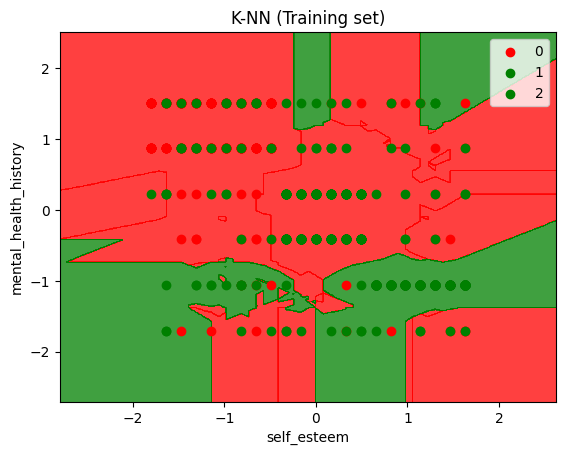

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('self_esteem')
plt.ylabel('mental_health_history')
plt.legend()
plt.show()

C:\Users\62895\AppData\Local\Temp\ipykernel_19880\988532796.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


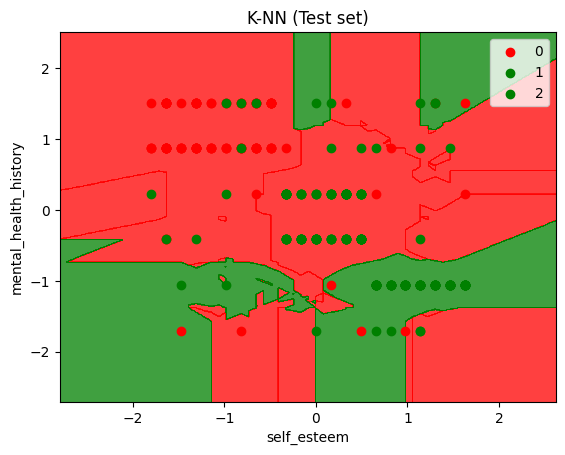

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('self_esteem')
plt.ylabel('mental_health_history')
plt.legend()
plt.show()

C:\Users\62895\AppData\Local\Temp\ipykernel_19880\2063481534.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


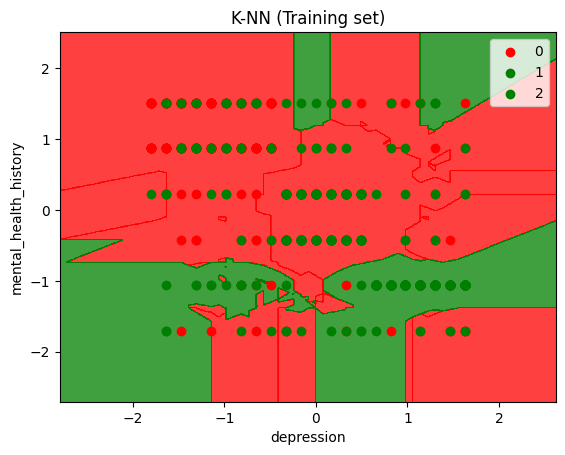

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('depression')
plt.ylabel('mental_health_history')
plt.legend()
plt.show()